In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
file_path = "C:/Users/vyshn/Downloads/channel_details-checkpoint.csv"
df = pd.read_csv(file_path)
df.head(10)

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description
0,UChbmOgxUOdT-TttaPw8-DgA,Дембельский альбом,Film & Animation,162000,234156675,657,2023-10-09T13:56:49.563976Z,NaN
1,UC9WxX09vr-01lDKa322FINw,Aina Asif Official,Film & Animation,404000,124226694,519,2023-10-07T05:40:45.019003Z,Aalamualaikum everyone\nI am Aina Asif I Hope ...
2,UC9nuJbEL-AMJLLqc2-ej8xQ,Bongo,Film & Animation,10200000,1269940793,1361,2014-08-25T13:02:03Z,About Bongo : \nBongo owned and managed by BON...
3,UC5RLcUMn6TqvRJnhBTtzWUg,Sarotsi X,Film & Animation,1040000,1773940347,1307,2021-01-02T21:24:52.777556Z,⚡️Sarotsi X⚡️\nAnime AMV - Anime Edit - Short ...
4,UCidQtV5C7o1pzZ3Xo6V9fQA,楽しいショート,Film & Animation,545000,2518747702,1048,2021-03-22T12:55:09.571244Z,NaN
5,UCvMb_oSnpYLzCRAKPn1VuSg,MFlow Entertainment,Film & Animation,510000,210811800,1041,2014-10-31T02:23:04Z,TO BE A PART OF MFLOW FAMILY!\nJoin Membership...
6,UCMyHiW13BN33Bzpb1jmtTnw,Anime Burst,Film & Animation,280000,251705264,437,2024-04-27T13:49:30.270614Z,NaN
7,UCR_dCM5rAnS2hjTF5SHMq3g,NAPTOON,Film & Animation,2910000,1204768695,545,2023-03-16T06:47:41.426331Z,"Hello, Welcome to NAPTOON! Hope you enjoy our ..."
8,UCHrknf1C9Hwn8HxoJG15lBw,bright,Film & Animation,196000,224438863,259,2021-09-17T02:29:20.628354Z,"what brings you to my channel, traveller?"
9,UC2uqduIrS_NCnYHUEtEyv8g,Gmoydi,Film & Animation,803000,1709922888,466,2023-07-23T19:10:12.783063Z,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   channel_id           1530 non-null   object
 1   channel_title        1530 non-null   object
 2   category             1530 non-null   object
 3   subscriber_count     1530 non-null   int64 
 4   view_count           1530 non-null   int64 
 5   video_count          1530 non-null   int64 
 6   created_at           1530 non-null   object
 7   channel_description  1452 non-null   object
dtypes: int64(3), object(5)
memory usage: 95.8+ KB


In [121]:
df.columns

Index(['channel_id', 'channel_title', 'category', 'subscriber_count',
       'view_count', 'video_count', 'created_at', 'channel_description'],
      dtype='object')

In [19]:
round(df.describe())

,subscriber_count,view_count,video_count
count,1530.0,1.530000e+03,1530.0
mean,4285225.0,2.481374e+09,6603.0
std,16414373.0,1.156181e+10,29603.0
min,0.0,4.000000e+00,0.0
25%,110250.0,3.757922e+07,246.0
50%,745000.0,3.008834e+08,746.0
75%,3077500.0,1.509188e+09,1854.0
max,388000000.0,2.946365e+11,491443.0


# DATA VALIDATION

In [114]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [96]:
duplicates = df[df.duplicated()]

In [98]:
duplicates

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description,day_of_the_week,year,month,no_of_years,avg_views_per_video


In [106]:
# Check for any missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 channel_id              0
channel_title           0
category                0
subscriber_count        0
view_count              0
video_count             0
created_at              0
channel_description    76
day_of_the_week         0
year                    0
month                   0
no_of_years             0
avg_views_per_video     0
dtype: int64


In [108]:
df["channel_description"].fillna(df["channel_description"].mode()[0], inplace=True)

In [110]:
# Display data types
print("Data types:\n", df.dtypes)

Data types:
 channel_id                     object
channel_title                  object
category                       object
subscriber_count                int64
view_count                      int64
video_count                     int64
created_at             datetime64[ns]
channel_description            object
day_of_the_week                 int32
year                            int32
month                           int32
no_of_years                   float64
avg_views_per_video           float64
dtype: object


In [112]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# EDA

| Variable/Column      | Type |
| -------------------- | ---- |
| channel\_id          | CN   |
| channel\_title       | CN   |
| category             | CO   |
| subscriber\_count    | ND   |
| view\_count          | NC   |
| video\_count         | ND   |
| created\_at          | CN   |
| channel\_description | CN   |

| Column Name           | Variable Type                  |
| --------------------- | ------------------------------ |
| `channel_id`          | **CN** (Categorical Nominal)   |
| `channel_title`       | **CN** (Categorical Nominal)   |
| `category`            | **CO** (Categorical Ordinal)\* |
| `subscriber_count`    | **NC** (Numeric Continuous)    |
| `view_count`          | **NC** (Numeric Continuous)    |
| `video_count`         | **ND** (Numeric Discrete)      |
| `created_at`          | **CD** (Categorical Date)\*\*  |
| `channel_description` | **CN** (Categorical Nominal)   |

In [119]:
file_path = "C:/Users/vyshn/Downloads/channel_details-checkpoint.csv"
df = pd.read_csv(file_path)
df.head()

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description
0,UChbmOgxUOdT-TttaPw8-DgA,Дембельский альбом,Film & Animation,162000,234156675,657,2023-10-09T13:56:49.563976Z,NaN
1,UC9WxX09vr-01lDKa322FINw,Aina Asif Official,Film & Animation,404000,124226694,519,2023-10-07T05:40:45.019003Z,Aalamualaikum everyone\nI am Aina Asif I Hope ...
2,UC9nuJbEL-AMJLLqc2-ej8xQ,Bongo,Film & Animation,10200000,1269940793,1361,2014-08-25T13:02:03Z,About Bongo : \nBongo owned and managed by BON...
3,UC5RLcUMn6TqvRJnhBTtzWUg,Sarotsi X,Film & Animation,1040000,1773940347,1307,2021-01-02T21:24:52.777556Z,⚡️Sarotsi X⚡️\nAnime AMV - Anime Edit - Short ...
4,UCidQtV5C7o1pzZ3Xo6V9fQA,楽しいショート,Film & Animation,545000,2518747702,1048,2021-03-22T12:55:09.571244Z,NaN


In [123]:
df.columns

Index(['channel_id', 'channel_title', 'category', 'subscriber_count',
       'view_count', 'video_count', 'created_at', 'channel_description'],
      dtype='object')

In [125]:
df.columns

Index(['channel_id', 'channel_title', 'category', 'subscriber_count',
       'view_count', 'video_count', 'created_at', 'channel_description'],
      dtype='object')

# Frequency Distribution

In [129]:
df['category'].value_counts()

category
Travel & Events          159
Movies                   150
Film & Animation         123
Comedy                   109
Music                     98
Entertainment             96
Autos & Vehicles          90
Nonprofits & Activism     90
Sports                    88
Science & Technology      88
Gaming                    87
Howto & Style             86
Pets & Animals            84
Education                 70
News & Politics           59
People & Blogs            27
Anime                     20
Cartoons & Animations      6
Name: count, dtype: int64

# Percentage Distribution

In [131]:
df['category'].value_counts(normalize=True) * 100

category
Travel & Events          10.392157
Movies                    9.803922
Film & Animation          8.039216
Comedy                    7.124183
Music                     6.405229
Entertainment             6.274510
Autos & Vehicles          5.882353
Nonprofits & Activism     5.882353
Sports                    5.751634
Science & Technology      5.751634
Gaming                    5.686275
Howto & Style             5.620915
Pets & Animals            5.490196
Education                 4.575163
News & Politics           3.856209
People & Blogs            1.764706
Anime                     1.307190
Cartoons & Animations     0.392157
Name: proportion, dtype: float64

In [135]:
from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

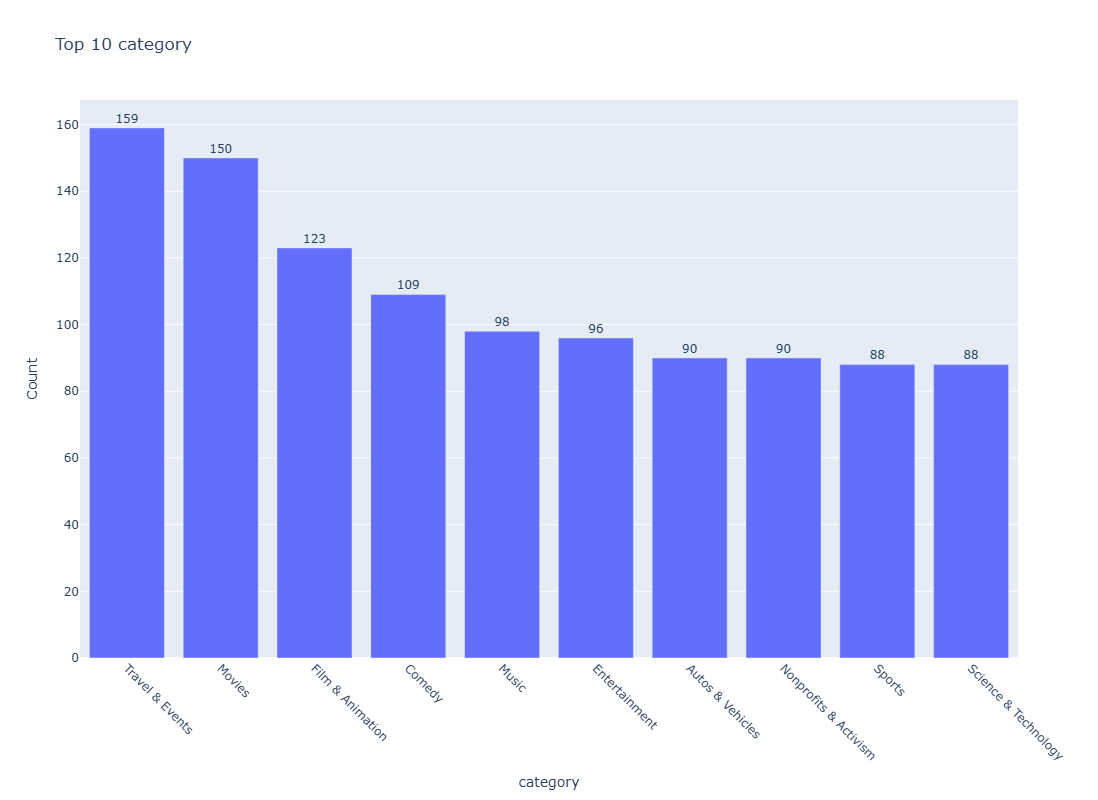

In [137]:
top_jobs = df['category'].value_counts().head(10).reset_index()
top_jobs.columns = ['category', 'Count']


fig = px.bar(
    top_jobs,
    x='category',
    y='Count',
    title='Top 10 category ',
    text='Count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=45,
    height=800,
    width=800
)

fig.show()

 Insight:

‘Travel & Events’ leads with 159 videos, followed by ‘Movies’ (150) and ‘Film & Animation’ (123).These top 3 categories make up the most dominant content themes, reflecting user interest in visual storytelling, cinematic experiences, and escapism.

Categories like ‘Comedy’, ‘Music’, and ‘Entertainment’ remain strong, showing diversity in viewer preferences.

‘Science & Technology’ and ‘Nonprofits & Activism’, though lower in count (~88), still made the top 10, indicating growing niche engagement.



In [140]:
sc = df['subscriber_count']

# Measures of Central Tendency

In [143]:
print("Mean:",sc.mean())
print("Median:", sc.median())
print("Mode:", sc.mode().values[0])

Mean: 4285225.129411764
Median: 745000.0
Mode: 0


# Measures of Dispersion

In [146]:
print("Range:", sc.max() - sc.min())
print("Variance:", sc.var())
print("Standard Deviation:", sc.std())
print("Five Number Summary:\n", sc.describe()[['min', '25%', '50%', '75%', 'max']])

Range: 388000000
Variance: 269431636822655.62
Standard Deviation: 16414372.873267367
Five Number Summary:
 min            0.0
25%       110250.0
50%       745000.0
75%      3077500.0
max    388000000.0
Name: subscriber_count, dtype: float64


# Measures of Symmetry

In [148]:
print("Skewness:", sc.skew()) # measures asymmetry of the data distribution
print("Kurtosis:", sc.kurt()) # measures the presence of the outliers in the distribution

Skewness: 14.27853542897009
Kurtosis: 274.35170331313884


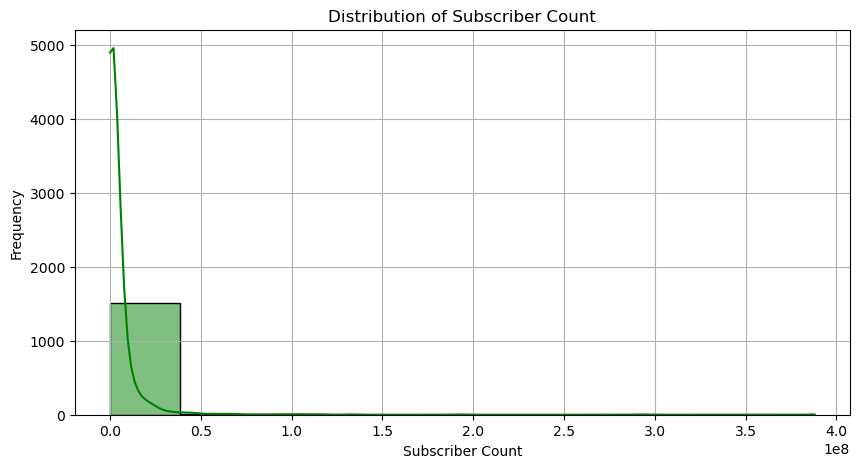

In [151]:
plt.figure(figsize=(10, 5))
sns.histplot(df['subscriber_count'], kde=True, bins=10, color='green', edgecolor='black')
plt.title("Distribution of Subscriber Count")
plt.xlabel("Subscriber Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Frequency Distribution

In [154]:
df['view_count'].value_counts()

view_count
2878946597    3
2345503564    2
3578328058    2
2112          2
8365831155    2
             ..
1574001501    1
1827288234    1
243453024     1
238178276     1
9500          1
Name: count, Length: 1521, dtype: int64

# Percentage Distribution

In [157]:
df['view_count'].value_counts(normalize=True) * 100

view_count
2878946597    0.196078
2345503564    0.130719
3578328058    0.130719
2112          0.130719
8365831155    0.130719
                ...   
1574001501    0.065359
1827288234    0.065359
243453024     0.065359
238178276     0.065359
9500          0.065359
Name: proportion, Length: 1521, dtype: float64

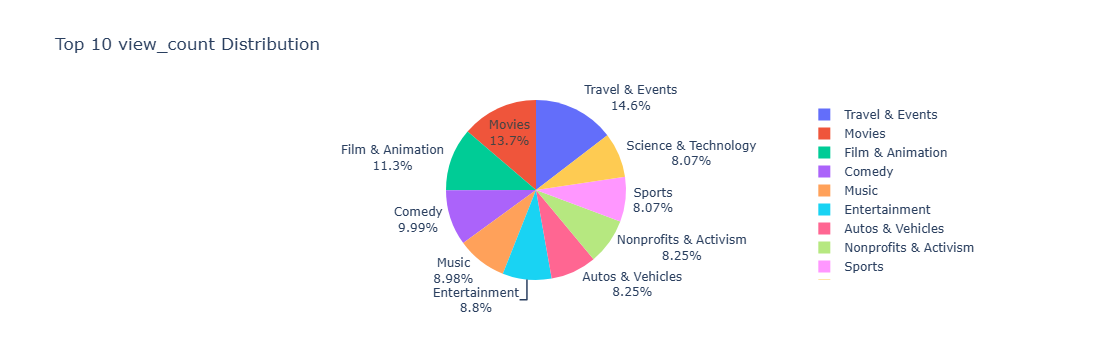

In [159]:
category = df['category'].value_counts().head(10).reset_index()
category.columns = ['category', 'view_count',]

fig = px.pie(
    category,
    names='category',
    values='view_count',
    title='Top 10 view_count Distribution',
)

fig.update_traces(textinfo='percent+label')
fig.show()

- Descriptive Stats Measures used to study data between two or more columns

**Bi/Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical...**|**FDT**


       - Correlation Coeffiecient Relation Categories

                    0.75 to 1 - Strong Correlation
                    0.50 to 0.75 - Moderate Correlation
                    <0.50 - Weak Correlation

In [162]:
df

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description
0,UChbmOgxUOdT-TttaPw8-DgA,Дембельский альбом,Film & Animation,162000,234156675,657,2023-10-09T13:56:49.563976Z,NaN
1,UC9WxX09vr-01lDKa322FINw,Aina Asif Official,Film & Animation,404000,124226694,519,2023-10-07T05:40:45.019003Z,Aalamualaikum everyone\nI am Aina Asif I Hope ...
2,UC9nuJbEL-AMJLLqc2-ej8xQ,Bongo,Film & Animation,10200000,1269940793,1361,2014-08-25T13:02:03Z,About Bongo : \nBongo owned and managed by BON...
3,UC5RLcUMn6TqvRJnhBTtzWUg,Sarotsi X,Film & Animation,1040000,1773940347,1307,2021-01-02T21:24:52.777556Z,⚡️Sarotsi X⚡️\nAnime AMV - Anime Edit - Short ...
4,UCidQtV5C7o1pzZ3Xo6V9fQA,楽しいショート,Film & Animation,545000,2518747702,1048,2021-03-22T12:55:09.571244Z,NaN
...,...,...,...,...,...,...,...,...
1525,UClDT7lvsxowovdb2wc_snSw,Adam Tyler,Cartoons & Animations,0,1620,20,2020-10-22T09:53:19.474379Z,NaN
1526,UC5hDOX1r0f3pqywlnK9YsEg,Violest Std,Cartoons & Animations,3,936,3,2015-12-12T04:49:33Z,NaN
1527,UCbmcndOs-RE1F1a8b6OzhHA,Michael Smith,Cartoons & Animations,1,622,6,2016-04-01T10:02:24Z,NaN
1528,UCjsVTmua72MxdcO6NYHxCIg,Ireland's Coast to Coast,Cartoons & Animations,18,3227,31,2016-05-08T12:50:22Z,Ireland's Iconic Race across Ireland! From En...


Pure Numeric| Mixed Columns| Pure Categorical                       
-----|-----|-----
 subscriber_count vs view_count  | subscriber_count vs category | category vs channel_title             
 subscriber_count vs video_count | view_count vs category | category vs created_at                
 view_count vs video_count       | video_count vs category | created_at vs channel_title          
etc.. |etc..|ect...   

# Bi-Variate

** Pure Numeric

Descriptive Stats

. Correlation cofficient

In [167]:
print("subscriber_count vs view_count")

display(round(df[['subscriber_count','view_count']].corr(),2))

subscriber_count vs view_count


,subscriber_count,view_count
subscriber_count,1.00,0.84
view_count,0.84,1.00


In [169]:
print(" subscriber_count vs video_count ")

display(round(df[['subscriber_count','video_count']].corr(),2))

 subscriber_count vs video_count 


,subscriber_count,video_count
subscriber_count,1.00,0.12
video_count,0.12,1.00


In [171]:
print("view_count vs video_count")

display(round(df[['view_count','video_count']].corr(),2))

view_count vs video_count


,view_count,video_count
view_count,1.00,0.16
video_count,0.16,1.00


. Visual

. Pie/Bar Char

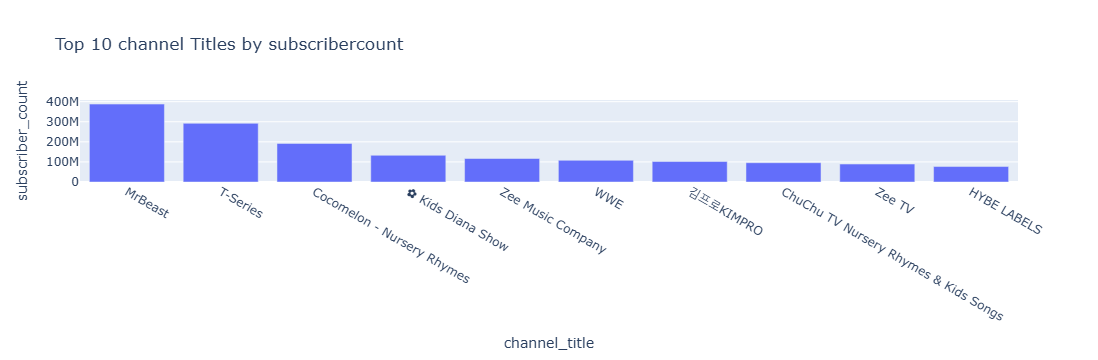

In [174]:
top_10 = df.sort_values(by='subscriber_count', ascending=False).head(10)

# Create bar chart
fig = px.bar(top_10, x='channel_title', y='subscriber_count', 
             title='Top 10 channel Titles by subscribercount')
fig.show()

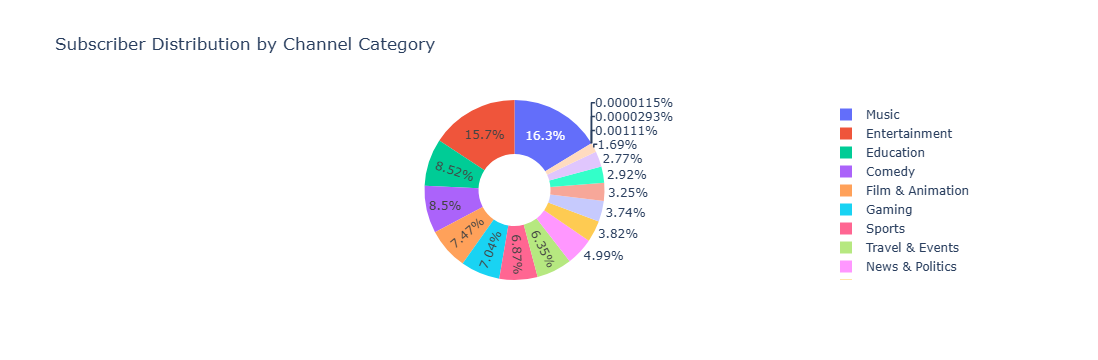

In [176]:
import plotly.express as px

fig = px.pie(df,
             names='category',
             values='subscriber_count',
             title='Subscriber Distribution by Channel Category',
             hole=0.4)  # optional: donut style
fig.show()

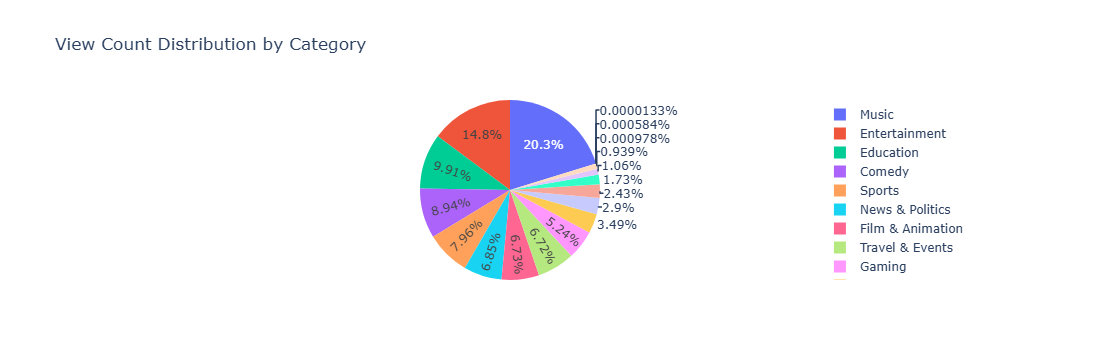

In [178]:
fig = px.pie(df,
             names='category',
             values='view_count',
             title='View Count Distribution by Category')
fig.show()

. Visual

. Scatter/Heatmaps/Pairplots

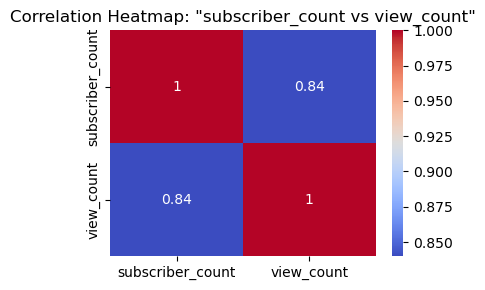

In [183]:
plt.figure(figsize=(4, 3))
sns.heatmap(round(df[['subscriber_count', 'view_count']].corr(), 2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: "subscriber_count vs view_count"')
plt.tight_layout()
plt.show()

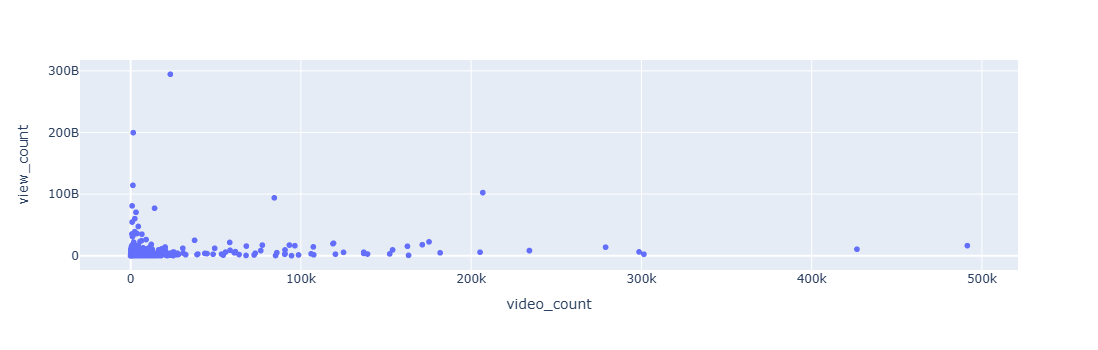

<Figure size 400x300 with 0 Axes>

In [185]:
plt.figure(figsize=(4, 3))
px.scatter(df, x='video_count', y='view_count', width=600, height=350).show()

# sns.heatmap(round(data[['TotalNumberofSingers','Numb

# Multi-Variate Analysis

In [188]:
df.head()

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description
0,UChbmOgxUOdT-TttaPw8-DgA,Дембельский альбом,Film & Animation,162000,234156675,657,2023-10-09T13:56:49.563976Z,NaN
1,UC9WxX09vr-01lDKa322FINw,Aina Asif Official,Film & Animation,404000,124226694,519,2023-10-07T05:40:45.019003Z,Aalamualaikum everyone\nI am Aina Asif I Hope ...
2,UC9nuJbEL-AMJLLqc2-ej8xQ,Bongo,Film & Animation,10200000,1269940793,1361,2014-08-25T13:02:03Z,About Bongo : \nBongo owned and managed by BON...
3,UC5RLcUMn6TqvRJnhBTtzWUg,Sarotsi X,Film & Animation,1040000,1773940347,1307,2021-01-02T21:24:52.777556Z,⚡️Sarotsi X⚡️\nAnime AMV - Anime Edit - Short ...
4,UCidQtV5C7o1pzZ3Xo6V9fQA,楽しいショート,Film & Animation,545000,2518747702,1048,2021-03-22T12:55:09.571244Z,NaN


In [190]:
df.corr(numeric_only=True)

,subscriber_count,view_count,video_count
subscriber_count,1.000000,0.844051,0.118148
view_count,0.844051,1.000000,0.156146
video_count,0.118148,0.156146,1.000000


<Axes: >

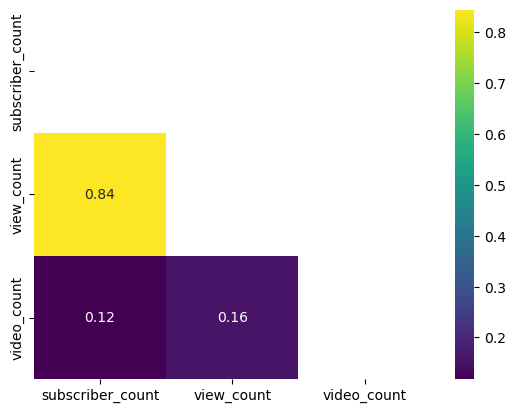

In [192]:
lower = np.triu(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

In [194]:
round(df.groupby(['category', 'channel_title'])[['subscriber_count']].sum(), 2)

subscriber_count
category        channel_title                      
Anime           Duy Khanh Le                    702
                Soulemani Sakare                 23
                bobby                            23
                สไบ สบาย                          2
                九伴动漫                            932
...                                             ...
Travel & Events 片っ端から喫茶店                     105000
                點 Cook Guide                1220000
                꼬마월드                          29200
                남해동광호선장 박형일                  551000
                푸드킹덤 Food Kingdom           5140000

[1381 rows x 1 columns]

In [196]:
round(df.groupby(['category', 'channel_title'])[['view_count']].sum(), 2)

view_count
category        channel_title                
Anime           Duy Khanh Le           489802
                Soulemani Sakare        13172
                bobby                    7328
                สไบ สบาย                 1339
                九伴动漫                  1209760
...                                       ...
Travel & Events 片っ端から喫茶店             28882286
                點 Cook Guide        244123025
                꼬마월드                 12110219
                남해동광호선장 박형일        1423111338
                푸드킹덤 Food Kingdom  2724004837

[1381 rows x 1 columns]

In [198]:
round(df.groupby(['category', 'channel_title'])[['video_count']].sum(), 2)

video_count
category        channel_title                 
Anime           Duy Khanh Le               151
                Soulemani Sakare            16
                bobby                      168
                สไบ สบาย                     4
                九伴动漫                        75
...                                        ...
Travel & Events 片っ端から喫茶店                   786
                點 Cook Guide              1602
                꼬마월드                       521
                남해동광호선장 박형일               5578
                푸드킹덤 Food Kingdom         1681

[1381 rows x 1 columns]

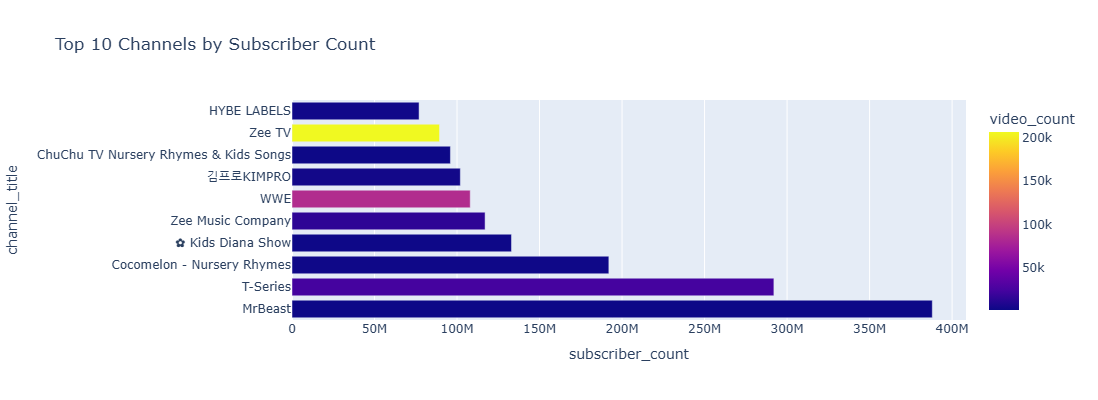

In [200]:
import plotly.express as px

# Sort and take top 10
top10 = df.sort_values(by='subscriber_count', ascending=False).head(10)

# Create bar chart
fig = px.bar(top10,
             x="subscriber_count",
             y="channel_title",
             color="video_count",
             hover_data=["view_count", "category"],
             height=400,
             title="Top 10 Channels by Subscriber Count")
fig.show()

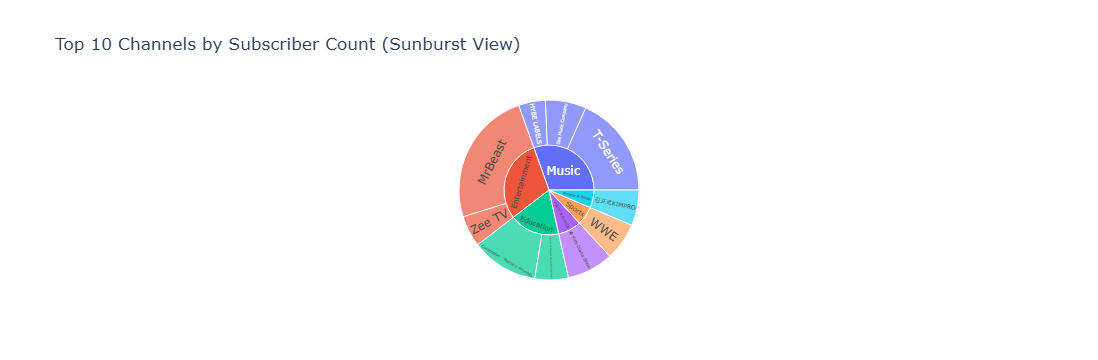

In [202]:
import plotly.express as px

# Step 1: Get top 10 channels by subscriber count
top10 = df.sort_values(by='subscriber_count', ascending=False).head(10)

# Step 2: Create sunburst chart
figure = px.sunburst(
    top10,
    path=['category', 'channel_title'],
    values='subscriber_count',
    title='Top 10 Channels by Subscriber Count (Sunburst View)'
)

figure.show()

# outlier Handling

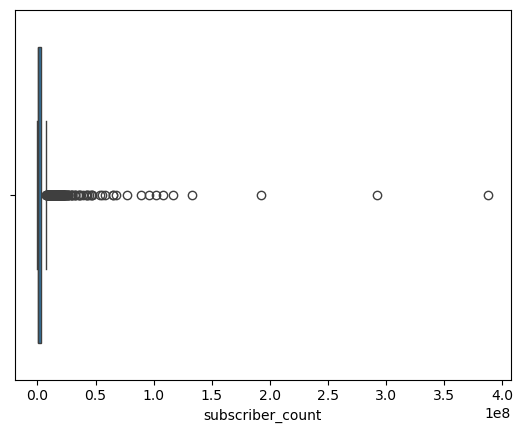

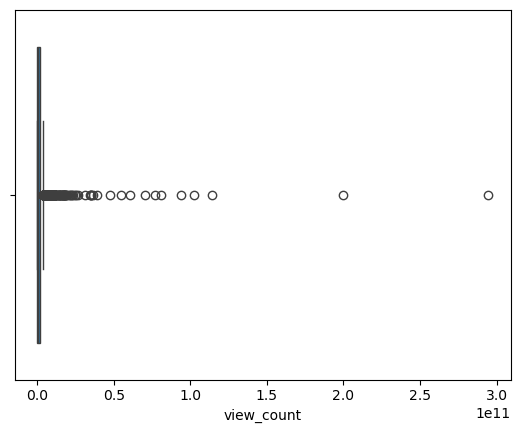

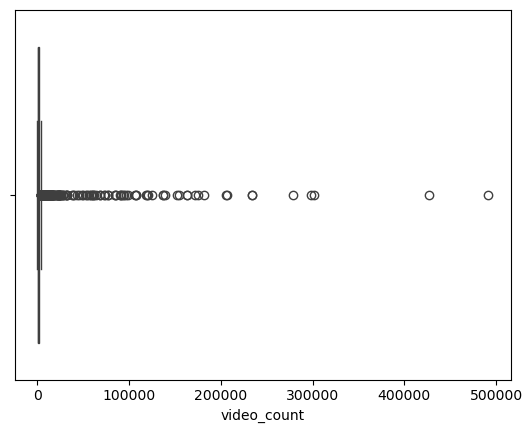

In [205]:
num=df.select_dtypes(include='number').columns
for i in num:
    sns.boxplot(data=df,x=i)
    plt.show()

In [207]:
column=['subscriber_count','view_count','video_count']
for i in column:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - 1.5 * IQR)
    upper_bound = round(Q3 + 1.5 * IQR)
    print('lower_bound of',i,lower_bound)
    print('upper_bound',i,upper_bound)
    df[i] = np.where((df[i] > upper_bound),upper_bound,df[i])

lower_bound of subscriber_count -4340625
upper_bound subscriber_count 7528375
lower_bound of view_count -2169834607
upper_bound view_count 3716602270
lower_bound of video_count -2165
upper_bound video_count 4266


In [209]:
df['subscriber_count'].min()

0

In [211]:
df.head()

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description
0,UChbmOgxUOdT-TttaPw8-DgA,Дембельский альбом,Film & Animation,162000,234156675,657,2023-10-09T13:56:49.563976Z,NaN
1,UC9WxX09vr-01lDKa322FINw,Aina Asif Official,Film & Animation,404000,124226694,519,2023-10-07T05:40:45.019003Z,Aalamualaikum everyone\nI am Aina Asif I Hope ...
2,UC9nuJbEL-AMJLLqc2-ej8xQ,Bongo,Film & Animation,7528375,1269940793,1361,2014-08-25T13:02:03Z,About Bongo : \nBongo owned and managed by BON...
3,UC5RLcUMn6TqvRJnhBTtzWUg,Sarotsi X,Film & Animation,1040000,1773940347,1307,2021-01-02T21:24:52.777556Z,⚡️Sarotsi X⚡️\nAnime AMV - Anime Edit - Short ...
4,UCidQtV5C7o1pzZ3Xo6V9fQA,楽しいショート,Film & Animation,545000,2518747702,1048,2021-03-22T12:55:09.571244Z,NaN


# Feature Engneering

In [ ]:
df['created_at']=df['created_at'].apply(lambda x:x.split('T')[0])
df['created_at']=pd.to_datetime(df['created_at'])

In [233]:
df['day_of_the_week']=df['created_at'].dt.weekday
df['year']=df['created_at'].dt.year
df['month']=df['created_at'].dt.month

In [ ]:
from datetime import datetime
present_date=pd.to_datetime('2025-05-05')
df['no_of_years'] = round((present_date - df['created_at']).dt.days / 365,1)

<Axes: xlabel='year'>

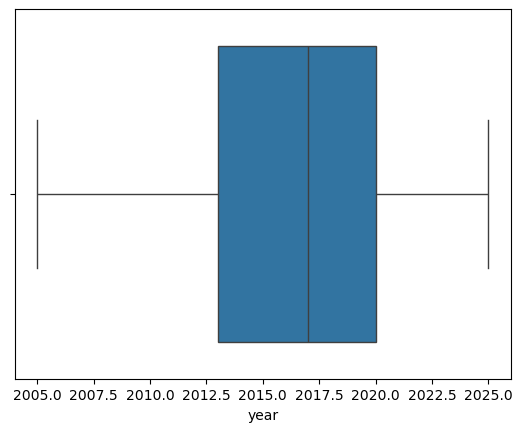

In [239]:
sns.boxplot(data=df,x='year')

In [241]:
df=df[(df['video_count']!=0)]

In [243]:
df['avg_views_per_video']=round(df['view_count']/df['video_count'])

In [43]:
df['avg_views_per_video'].max()


57178496.0

In [245]:
df.head()

,channel_id,channel_title,category,subscriber_count,view_count,video_count,created_at,channel_description,day_of_the_week,year,month,no_of_years,avg_views_per_video
0,UChbmOgxUOdT-TttaPw8-DgA,Дембельский альбом,Film & Animation,162000,234156675,657,2023-10-09,NaN,0,2023,10,1.6,356403.0
1,UC9WxX09vr-01lDKa322FINw,Aina Asif Official,Film & Animation,404000,124226694,519,2023-10-07,Aalamualaikum everyone\nI am Aina Asif I Hope ...,5,2023,10,1.6,239358.0
2,UC9nuJbEL-AMJLLqc2-ej8xQ,Bongo,Film & Animation,7528375,1269940793,1361,2014-08-25,About Bongo : \nBongo owned and managed by BON...,0,2014,8,10.7,933094.0
3,UC5RLcUMn6TqvRJnhBTtzWUg,Sarotsi X,Film & Animation,1040000,1773940347,1307,2021-01-02,⚡️Sarotsi X⚡️\nAnime AMV - Anime Edit - Short ...,5,2021,1,4.3,1357261.0
4,UCidQtV5C7o1pzZ3Xo6V9fQA,楽しいショート,Film & Animation,545000,2518747702,1048,2021-03-22,NaN,0,2021,3,4.1,2403385.0


In [47]:
df.describe()

,subscriber_count,view_count,video_count,created_at,day_of_the_week,year,month,no_of_years,avg_views_per_video
count,1.527000e+03,1.527000e+03,1527.000000,1527,1527.000000,1527.000000,1527.000000,1527.000000,1.527000e+03
mean,2.056416e+06,9.966655e+08,1335.607728,2016-10-05 09:38:04.479371520,2.878193,2016.275049,6.371971,8.586837,1.198246e+06
min,0.000000e+00,4.000000e+00,1.000000,2005-09-06 00:00:00,0.000000,2005.000000,1.000000,0.000000,4.000000e+00
25%,1.130000e+05,3.869905e+07,248.500000,2013-01-27 12:00:00,1.000000,2013.000000,4.000000,4.600000,6.504900e+04
50%,7.580000e+05,3.067873e+08,747.000000,2017-10-13 00:00:00,3.000000,2017.000000,6.000000,7.600000,3.791190e+05
75%,3.080000e+06,1.512727e+09,1879.500000,2020-10-07 00:00:00,5.000000,2020.000000,9.000000,12.300000,1.012686e+06
max,7.528375e+06,3.716602e+09,4266.000000,2025-04-19 00:00:00,6.000000,2025.000000,12.000000,19.700000,5.717850e+07
std,2.613845e+06,1.306682e+09,1441.968618,NaN,1.961514,5.177864,3.314522,5.162313,3.172984e+06


In [49]:
df.columns

Index(['channel_id', 'channel_title', 'category', 'subscriber_count',
       'view_count', 'video_count', 'created_at', 'channel_description',
       'day_of_the_week', 'year', 'month', 'no_of_years',
       'avg_views_per_video'],
      dtype='object')

# splitting X and Y

In [296]:
x=df[['view_count', 'video_count',
       'avg_views_per_video']]
y=df['subscriber_count']

In [298]:
num_cols=df.select_dtypes(include='number')

<Axes: >

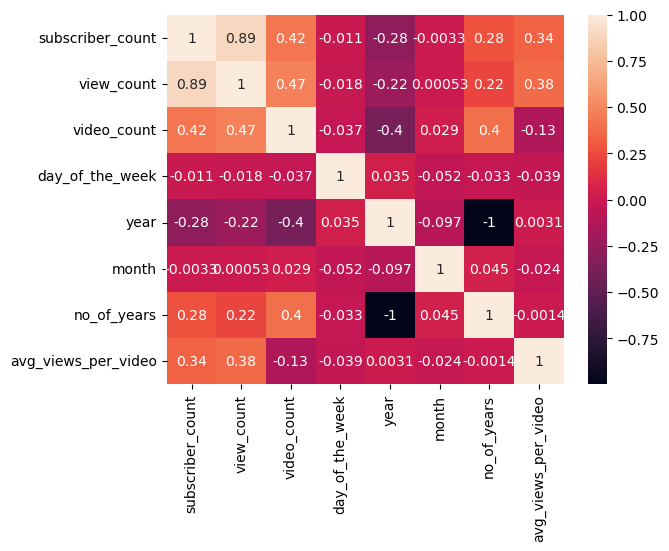

In [300]:
sns.heatmap(num_cols.corr(),annot=True)

# Train Test split

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.2)

# Standardisation

In [59]:
#standard_scalar
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [61]:
import pickle
with open("scaler11.pkl", "wb") as f:
    pickle.dump(s, f)

# importing neccessary Packages and libraries

In [274]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# model Initilization

In [276]:
linear=LinearRegression()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
ada_model = AdaBoostRegressor()
gradient=GradientBoostingRegressor()
xgb=XGBRegressor()
svr=SVR()
knn=KNeighborsRegressor()

# Training model with polynomial Features

In [278]:
#polynomial Regression
poly=PolynomialFeatures()
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [280]:
Model=[]
TrainRMSE=[]
TestRMSE=[]
TrainScore=[]
TestScore=[]
Fit=[]
model=['LinearRegression',
 'Lasso',
 'Ridge',
 'ElasticNet']

In [282]:
for i in [linear,lasso,ridge,elastic]:
    i.fit(x_train_poly,y_train)
    Model.append(i)
    y_train_predict=i.predict(x_train_poly)
    y_test_predict=i.predict(x_test_poly)
    print('mean_squared_error of train of ',str(i),mean_squared_error(y_train,y_train_predict))
    print('mean_squared_error of test of ',str(i),mean_squared_error(y_test,y_test_predict))
    print('root_mean_squared_error train of,',str(i),root_mean_squared_error(y_train,y_train_predict))
    TrainRMSE.append(root_mean_squared_error(y_train,y_train_predict))
    print('root_mean_squared_error test of',str(i),root_mean_squared_error(y_test,y_test_predict))
    TestRMSE.append(root_mean_squared_error(y_test,y_test_predict))
    r2_score_train=r2_score(y_train,y_train_predict)
    TrainScore.append(r2_score_train)
    r2_score_test=r2_score(y_test,y_test_predict)
    TestScore.append(r2_score_test)
    #Bias Varaince Tradeoff
    if r2_score_train<0.5 and r2_score_test<0.5:
        if abs(r2_score_train)==0 and abs(r2_score_test)==0:
            Fit.append('No Fit')
        else:
            Fit.append('Underfit')
    else:
        if abs(r2_score_train-r2_score_test)<=0.10:
            Fit.append('Good_fit')
        elif abs(r2_score_train-r2_score_test)>0.10:
            Fit.append('overfit')
        else:
            Fit.append('fit')
    print(f'train r2 score{r2_score_train},test r2 score{r2_score_test}')
    print("*"*100)

mean_squared_error of train of  LinearRegression() 1178193346120.7134
mean_squared_error of test of  LinearRegression() 1585285587344.881
root_mean_squared_error train of, LinearRegression() 1085446.1507236152
root_mean_squared_error test of LinearRegression() 1259081.2473168208
train r2 score0.8213841122350991,test r2 score0.7945195138949834
****************************************************************************************************
mean_squared_error of train of  Lasso() 1187357387498.5024
mean_squared_error of test of  Lasso() 1556564449421.9297
root_mean_squared_error train of, Lasso() 1089659.2988170672
root_mean_squared_error test of Lasso() 1247623.5207072403
train r2 score0.8199948297445829,test r2 score0.7982422711249798
****************************************************************************************************
mean_squared_error of train of  Ridge() 1187380594341.046
mean_squared_error of test of  Ridge() 1557789529445.113
root_mean_squared_error train of, Ri

In [284]:
df1=pd.DataFrame({
    "Model": model,
    "TrainRMSE": TrainRMSE,
    "TestRMSE": TestRMSE,
    "TrainScore": TrainScore,
    "TestScore": TestScore,
    "Fit": Fit
})
df1

,Model,TrainRMSE,TestRMSE,TrainScore,TestScore,Fit
0,LinearRegression,1.085446e+06,1.259081e+06,0.821384,0.794520,Good_fit
1,Lasso,1.089659e+06,1.247624e+06,0.819995,0.798242,Good_fit
2,Ridge,1.089670e+06,1.248114e+06,0.819991,0.798083,Good_fit
3,ElasticNet,1.269499e+06,1.499298e+06,0.755675,0.708634,Good_fit


# without Polynomial Features

In [286]:
linear=LinearRegression()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
ada_model = AdaBoostRegressor()
gradient=GradientBoostingRegressor()
xgb=XGBRegressor()
svr=SVR()
knn=KNeighborsRegressor()

In [288]:
Model=[]
TrainRMSE=[]
TestRMSE=[]
TrainScore=[]
TestScore=[]
Fit=[]

In [290]:
for i in [linear,lasso,ridge,elastic,dt_model,rf_model,ada_model,gradient,xgb,svr,knn]:
    i.fit(x_train,y_train)
    Model.append(i)
    y_train_predict=i.predict(x_train)
    y_test_predict=i.predict(x_test)
    print('mean_squared_error of train of ',str(i),mean_squared_error(y_train,y_train_predict))
    print('mean_squared_error of test of ',str(i),mean_squared_error(y_test,y_test_predict))
    print('root_mean_squared_error train of,',str(i),root_mean_squared_error(y_train,y_train_predict))
    TrainRMSE.append(root_mean_squared_error(y_train,y_train_predict))
    print('root_mean_squared_error test of',str(i),root_mean_squared_error(y_test,y_test_predict))
    TestRMSE.append(root_mean_squared_error(y_test,y_test_predict))
    r2_score_train=r2_score(y_train,y_train_predict)
    TrainScore.append(r2_score_train)
    r2_score_test=r2_score(y_test,y_test_predict)
    TestScore.append(r2_score_test)
    #Bias Varaince Tradeoff
    if r2_score_train<0.5 and r2_score_test<0.5:
        if abs(r2_score_train)==0 and abs(r2_score_test)==0:
            Fit.append('No Fit')
        else:
            Fit.append('Underfit')
    else:
        if abs(r2_score_train-r2_score_test)<=0.10:
            Fit.append('Good_fit')
        elif abs(r2_score_train-r2_score_test)>0.10:
            Fit.append('overfit')
        else:
            Fit.append('fit')
    print(f'train r2 score{r2_score_train},test r2 score{r2_score_test}')
    print("*"*100)

mean_squared_error of train of  LinearRegression() 1268936992494.5342
mean_squared_error of test of  LinearRegression() 1651386006752.9204
root_mean_squared_error train of, LinearRegression() 1126471.034911477
root_mean_squared_error test of LinearRegression() 1285062.6470148917
train r2 score0.807627238620551,test r2 score0.7859517539783252
****************************************************************************************************
mean_squared_error of train of  Lasso() 1268936992505.69
mean_squared_error of test of  Lasso() 1651385733200.022
root_mean_squared_error train of, Lasso() 1126471.0349164286
root_mean_squared_error test of Lasso() 1285062.5405792599
train r2 score0.8076272386188597,test r2 score0.7859517894355217
****************************************************************************************************
mean_squared_error of train of  Ridge() 1268943229446.88
mean_squared_error of test of  Ridge() 1651910837950.574
root_mean_squared_error train of, Ridge()

In [292]:
model=['LinearRegression',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'AdaBoostRegressor',
 'GradientBoostingRegressor',
 'XGBRegressor',
 'SVR',
 'knn']

In [294]:
new_data = pd.DataFrame({
    "Model": model,
    "TrainRMSE": TrainRMSE,
    "TestRMSE": TestRMSE,
    "TrainScore": TrainScore,
    "TestScore": TestScore,  
    "Fit": Fit
})
new_data

,Model,TrainRMSE,TestRMSE,TrainScore,TestScore,Fit
0,LinearRegression,1.126471e+06,1.285063e+06,0.807627,0.785952,Good_fit
1,Lasso,1.126471e+06,1.285063e+06,0.807627,0.785952,Good_fit
2,Ridge,1.126474e+06,1.285267e+06,0.807626,0.785884,Good_fit
3,ElasticNet,1.350916e+06,1.558988e+06,0.723331,0.684972,Good_fit
4,DecisionTreeRegressor,1.188810e+05,1.596259e+06,0.997857,0.669729,overfit
5,RandomForestRegressor,4.433370e+05,1.280837e+06,0.970203,0.787357,overfit
6,AdaBoostRegressor,1.090726e+06,1.405834e+06,0.819642,0.743828,Good_fit
7,GradientBoostingRegressor,8.099724e+05,1.287783e+06,0.900541,0.785044,overfit
8,XGBRegressor,1.836435e+05,1.363516e+06,0.994887,0.759019,overfit
9,SVR,2.856944e+06,3.139995e+06,-0.237391,-0.277971,Underfit


# Hyper Parameter Tuning for Ada Boost Regressor

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best hyperparameter
print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 10


In [80]:
lasso=Lasso(alpha=10)

In [81]:
lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [122]:
y_train_predict=lasso.predict(x_train)
y_test_predict=lasso.predict(x_test)
mean_squared_error(y_train,y_train_predict)
mean_squared_error(y_test,y_test_predict)
print(root_mean_squared_error(y_train,y_train_predict))
print(root_mean_squared_error(y_test,y_test_predict))

r2_score_train=r2_score(y_train,y_train_predict)
r2_score_test=r2_score(y_test,y_test_predict)
print(r2_score_train,r2_score_test)

1126471.035407281
1285061.585073434
0.8076272384512093 0.7859521077456891


In [82]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
random_search = RandomizedSearchCV(Lasso(), param_dist, cv=5, n_iter=10, scoring='r2', n_jobs=-1)
random_search.fit(x_train, y_train)
print("Best alpha:", random_search.best_params_['alpha'])

Best alpha: 100


In [83]:
lasso_r=Lasso(alpha=100)
lasso_r.fit(x_train,y_train)

Lasso(alpha=100)

In [84]:
lasso_r.fit(x_train,y_train)
y_train_predict=lasso_r.predict(x_train)
y_test_predict=lasso_r.predict(x_test)
mean_squared_error(y_train,y_train_predict)
mean_squared_error(y_test,y_test_predict)
print(root_mean_squared_error(y_train,y_train_predict))
print(root_mean_squared_error(y_test,y_test_predict))
r2_score_train=r2_score(y_train,y_train_predict)
r2_score_test=r2_score(y_test,y_test_predict)
print(r2_score_train,r2_score_test)

1126471.0845596553
1285052.078142466
0.8076272216632443 0.7859552748016992


# saving the file

In [91]:
with open("lasso_2.pkl", "wb") as file:
    pickle.dump(lasso, file)